In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack
from scipy import signal

In [149]:
sampling_rate = 4000
gain = 12
v_ref = 4.5
resolution = (2**23) - 1

<AxesSubplot:xlabel='timestamp'>

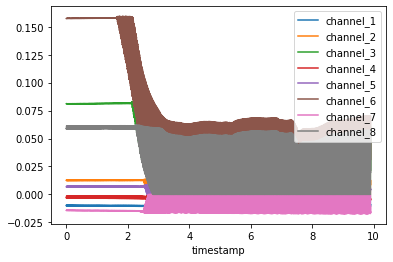

In [226]:
channel_data = np.load('channel_data.npy')
df = pd.DataFrame(data=channel_data.T).set_index(0)
df = (df * v_ref) / resolution
df /= gain
df.columns = "channel_" + df.columns.astype(str)
df.index.name = "timestamp"
df.index -= min(df.index)
df.index /= 10**6
df.iloc[10:].plot()

Text(0.5, 0, 'Frequency [Hz]')

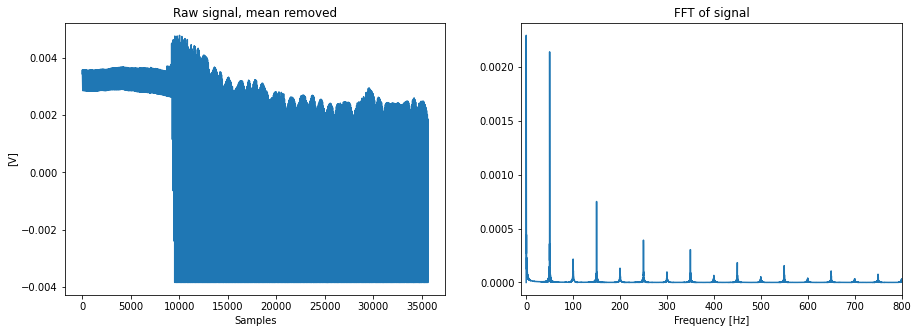

In [227]:
# Plot raw EMG signals and FFT
y = df.channel_5
y = y.to_numpy()
y = y[1000:-3000]           # Remove funky end-effects
y = y - y.mean()            # Center around zero

N = len(y)
T = 1 / sampling_rate
x = np.linspace(0.0, 1.0/(2.0*T), N//2)
y_fft = scipy.fftpack.fft(y)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(y)
# plt.xlim(7000,8000)
plt.title('Raw signal, mean removed')
plt.ylabel('[V]')
plt.xlabel('Samples')
plt.subplot(1, 2, 2)
plt.plot(x, 2.0/N * np.abs(y_fft[:N//2]))
plt.xlim(-10, 800)
plt.title('FFT of signal')
plt.xlabel('Frequency [Hz]')

 The argument 'scale_y' is depreciated and will be                         removed in a future version. Please use 'sharey' to remove this                         warning


<AxesSubplot:xlabel='Time (samples)'>

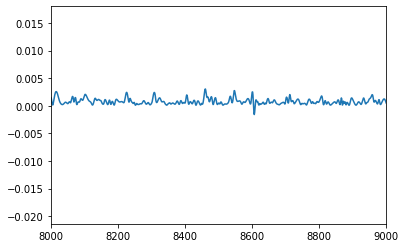

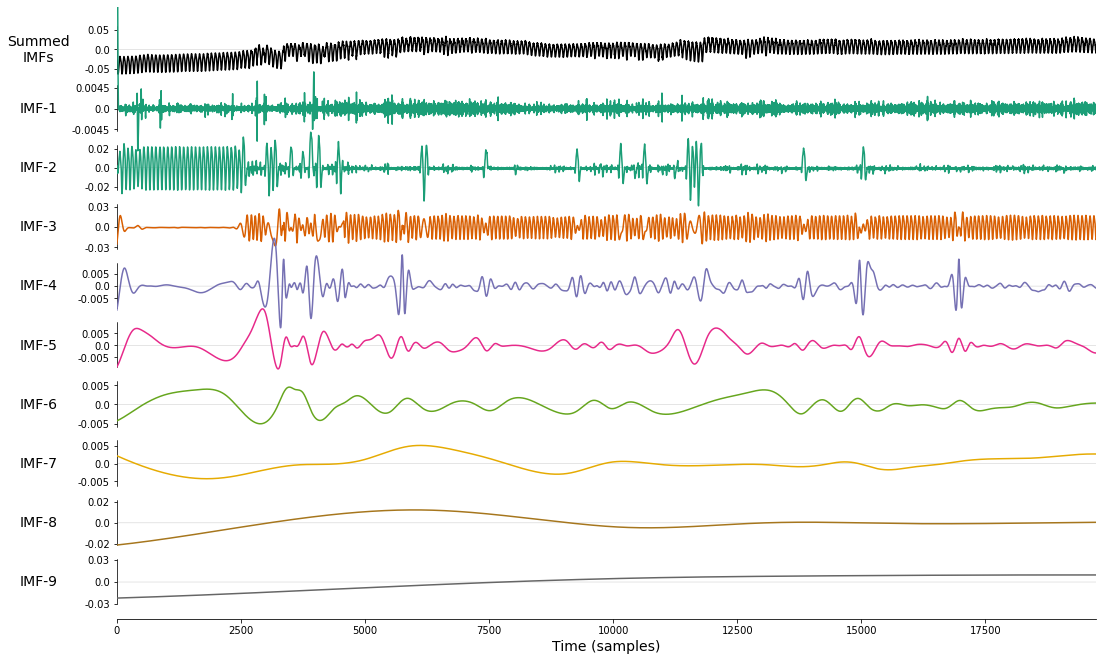

In [360]:
# EMD
import emd
seconds = 5
num_samples = seconds*sampling_rate

imf = emd.sift.sift(y - y.mean())
envelope = emd.sift.interp_envelope(imf, mode='upper')

plt.plot(envelope)
plt.xlim(8000,9000)
emd.plotting.plot_imfs(imf, scale_y=True, cmap=True)

Text(0.5, 0, 'Frequency [Hz]')

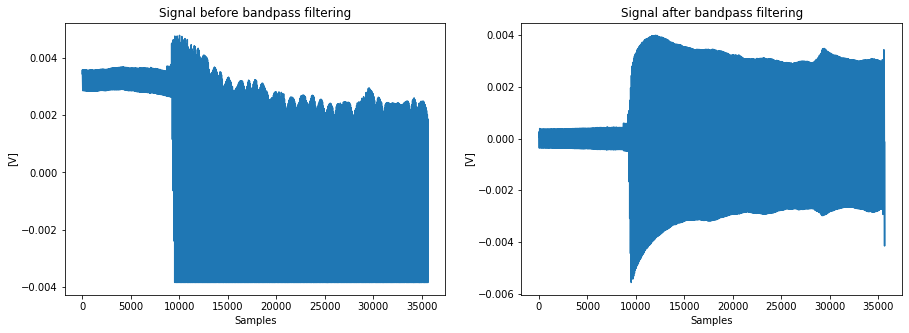

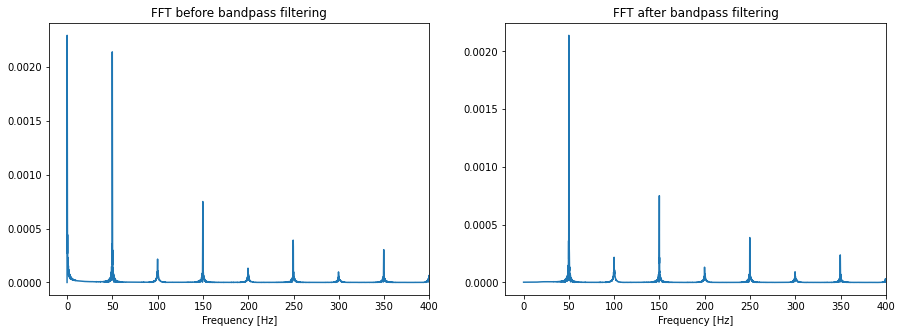

In [228]:
# Bandpass filter
high = 20        # Remove DC-related noise
low = 400       # EMG harmonics above 400Hz are generally due to noise
b, a = scipy.signal.butter(4, [high,low], btype='bandpass', fs=sampling_rate)
y_butter = scipy.signal.filtfilt(b, a, y)

N_butter = len(y_butter)
x_butter = np.linspace(0.0, 1.0/(2.0*T), N_butter//2)
y_butter_fft = scipy.fftpack.fft(y_butter)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(y)
# plt.xlim(7500,10000)
plt.title('Signal before bandpass filtering')
plt.ylabel('[V]')
plt.xlabel('Samples')
plt.subplot(1, 2, 2)
plt.plot(y_butter)
# plt.xlim(7500,10000)
plt.title('Signal after bandpass filtering')
plt.ylabel('[V]')
plt.xlabel('Samples')

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x, 2.0/N * np.abs(y_fft[:N//2]))
plt.xlim(-20, 400)
plt.title('FFT before bandpass filtering')
plt.xlabel('Frequency [Hz]')
plt.subplot(1, 2, 2)
plt.plot(x_butter, 2.0/N_butter * np.abs(y_butter_fft[:N_butter//2]))
plt.xlim(-20, 400)
plt.title('FFT after bandpass filtering')
plt.xlabel('Frequency [Hz]')


Text(0.5, 0, 'Frequency [Hz]')

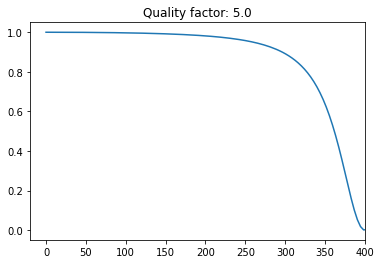

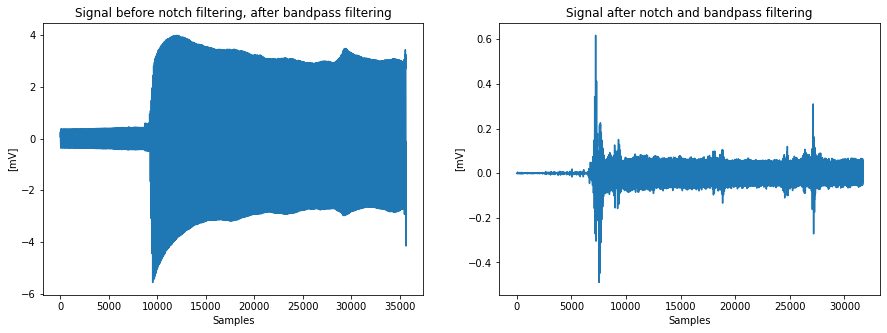

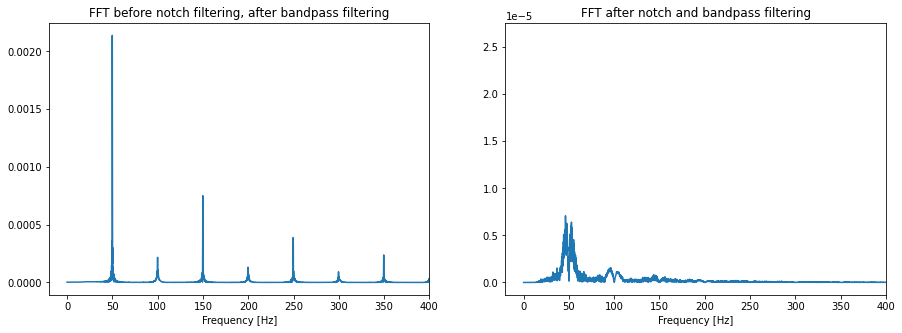

In [248]:
# Notch filter
notch_freq = 50.0     # Frequency to be removed from signal (Hz)
quality_factor = 5.0
# b_notch, a_notch = scipy.signal.iircomb(w0=notch_freq, Q=quality_factor, fs=sampling_rate, ftype='notch')
# freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
# y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_butter)

# y_notched = y_butter
# for i in range(1,9):
#     b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq*i, Q=quality_factor, fs=sampling_rate)
#     freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
#     y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_butter)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+50.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+100.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+150.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+200.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+250.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+300.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

b_notch, a_notch = scipy.signal.iirnotch(w0=notch_freq+350.0, Q=quality_factor, fs=sampling_rate)
freq, h = scipy.signal.freqz(b_notch, a_notch, fs=sampling_rate)
y_notched = scipy.signal.filtfilt(b_notch, a_notch, y_notched)

fig = plt.figure()
plt.plot(freq, h)
plt.xlim(-20, 400)
plt.title('Quality factor: ' + str(quality_factor))

y_notched = y_notched[2000:-2000]

N_notched = len(y_notched)
x_notched = np.linspace(0.0, 1.0/(2.0*T), N_notched//2)
y_notched_fft = scipy.fftpack.fft(y_notched)

b, a = scipy.signal.butter(4, 400, btype='lowpass', fs=sampling_rate)
y_filtered = scipy.signal.filtfilt(b, a, y_notched)
y_filtered_fft = scipy.fftpack.fft(y_notched)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(y_butter*1000)
# plt.xlim(6000,8000)
plt.title('Signal before notch filtering, after bandpass filtering')
plt.ylabel('[mV]')
plt.xlabel('Samples')
plt.subplot(1, 2, 2)
plt.plot(y_notched*1000)
# plt.xlim(2000, 12000)
plt.title('Signal after notch and bandpass filtering')
plt.ylabel('[mV]')
plt.xlabel('Samples')

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x_butter, 2.0/N_butter * np.abs(y_butter_fft[:N_butter//2]))
plt.xlim(-20, 400)
plt.title('FFT before notch filtering, after bandpass filtering')
plt.xlabel('Frequency [Hz]')
plt.subplot(1, 2, 2)
plt.plot(x_notched, 2.0/N_notched * np.abs(y_notched_fft[:N_notched//2]))
plt.xlim(-20, 400)
plt.title('FFT after notch and bandpass filtering')
plt.xlabel('Frequency [Hz]')

Text(0.5, 0, 'Frequency [Hz]')

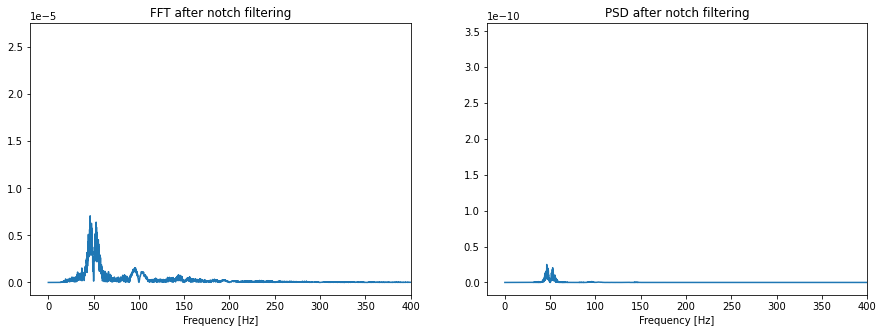

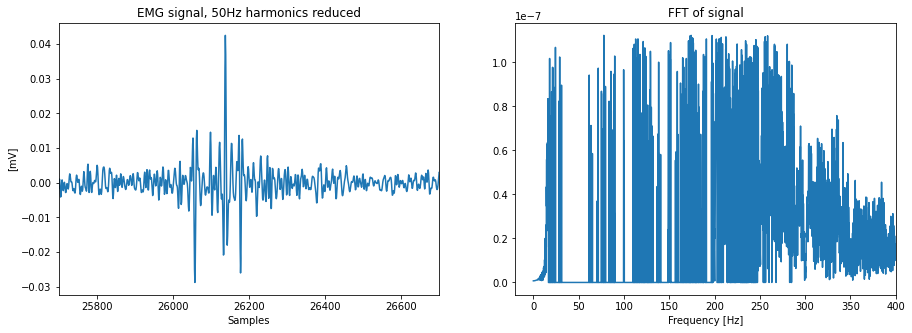

In [253]:
# Remove 50Hz harmonics from spectrum and transform back to time domain
psd = y_notched_fft * np.conj(y_notched_fft)/N_notched

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x_notched, 2.0/N_notched * np.abs(y_notched_fft[:N_notched//2]))
plt.xlim(-20, 400)
plt.title('FFT after notch filtering')
plt.xlabel('Frequency [Hz]')
plt.subplot(1, 2, 2)
plt.plot(x_notched, 2.0/N_notched * np.abs(psd[:N_notched//2]))
plt.xlim(-20, 400)
plt.title('PSD after notch filtering')
plt.xlabel('Frequency [Hz]')

threshold = 1e-10
psd_idxs = psd < threshold
psd_clean = psd * psd_idxs
y_fft_clean = psd_idxs * y_notched_fft
y_clean = scipy.fftpack.ifft(y_fft_clean)

N_clean = len(y_clean)
x_clean = np.linspace(0.0, 1.0/(2.0*T), N_clean//2)

y_fft_clean = 2.0/N_clean * np.abs(y_fft_clean[:N_clean//2])
y_clean = y_clean[1000:-1000]
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(y_clean*1000)
plt.xlim(25700,26700)
plt.title('EMG signal, 50Hz harmonics reduced')
plt.ylabel('[mV]')
plt.xlabel('Samples')
plt.subplot(1, 2, 2)
plt.plot(x_clean, y_fft_clean)
plt.xlim(-20, 400)
plt.title('FFT of signal')
plt.xlabel('Frequency [Hz]')

Text(0, 0.5, '[V]')

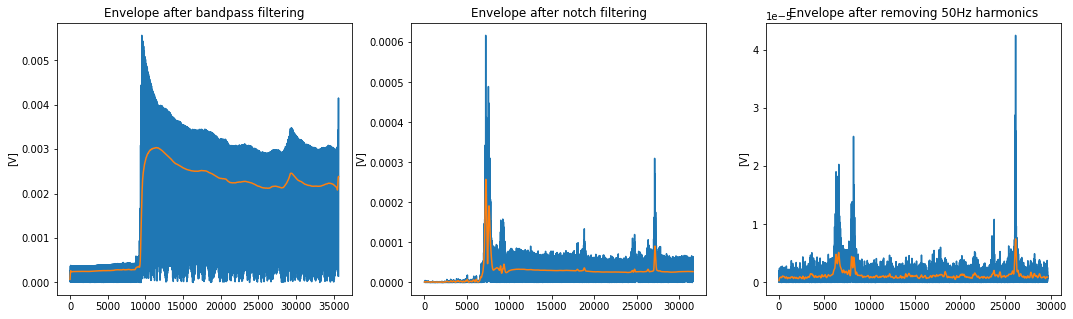

In [251]:
# Envelope
low_pass = 20
b, a = scipy.signal.butter(3, low_pass, btype='lowpass', fs=sampling_rate)
envelope_b = scipy.signal.filtfilt(b, a, abs(y_butter))
envelope_n = scipy.signal.filtfilt(b, a, abs(y_notched))
envelope_c = scipy.signal.filtfilt(b, a, abs(y_clean))


fig = plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
plt.plot(abs(y_butter))
plt.plot(envelope_b)
plt.title('Envelope after bandpass filtering')
plt.ylabel('[V]')
plt.subplot(1, 3, 2)
plt.plot(abs(y_notched))
plt.plot(envelope_n)
plt.title('Envelope after notch filtering')
plt.ylabel('[V]')
plt.subplot(1, 3, 3)
plt.plot(abs(y_clean))
plt.plot(envelope_c)
plt.title('Envelope after removing 50Hz harmonics')
plt.ylabel('[V]')